# Gestion et Analyse de MdP

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Import Fonction

In [26]:
# Fonction Calcule de Majuscules
def count_uppercase(pwd) :
    c = 0
    for char in pwd :
        if char.isupper() :
            c += 1
    return c

# Fonction Calcule de Miniscules
def count_lowercase(pwd) :
    c = 0
    for char in pwd :
        if char.islower() :
            c += 1
    return c

# Fonction Calcule de Chiffres
def count_digit(pwd) :
    c = 0
    for char in pwd :
        if char.isdigit() :
            c += 1
    return c

# Fonction calcule de Caractere Speciaux
def count_special_char(pwd) :
    return len(pwd) - ( count_digit(pwd) + 
                       count_lowercase(pwd) + 
                       count_uppercase(pwd) )

# Calcule de la Force d'un mot de passe         # A redefinir ?
def def_strength(pwd, len, upper, lower, digit, spe):
    s = 0
    if len >= 14 :
        s += 2
    elif len >= 8 :
        s += 1
    if digit >= 1 :
        s += 1
    if spe >= 1 :
        s += 1
    if upper >= 1 :
        s += 1
    if RepetitiveCharacteres(pwd) :
        if s != 0 : s -= 1
    if s >= 4 : return 'Fort'
    elif s >= 2 : return 'Moyen'
    else : return 'Faible'

def RepetitiveCharacteres(pwd) : 
    repeatCount = 0
    lastCharac = None
    for i in range (1, len(pwd)) :
        lastCharac = pwd[i-1]
        if (pwd[i] == lastCharac) :
            repeatCount += 1
        else :
            repeatCount = 0
        if repeatCount == 2 : return True
    return False

# Fonction extraction des carcateristics
def extract_features(password) : 
    length = len(password)
    upper = count_uppercase(password)
    lower = count_lowercase(password)
    digit = count_digit(password)
    spe = count_special_char(password)
    strength = def_strength(password, length, upper, lower, digit, spe)
    return [password, length, upper, lower, digit, spe, strength]

### Import Data

In [13]:
#Chargement du dataset

file_path = r'dataset/df64.csv'

df = pd.read_csv(file_path,
                  on_bad_lines='skip',
                  encoding="latin-1")

df.head(10)

,Unnamed: 0,password,length,upper,lower,digit,spe,strength
0,0,laurakaren,10,0,10,0,0,Faible
1,1,mkmillions,10,0,10,0,0,Faible
2,2,1iloveubor,10,0,9,1,0,Moyen
3,3,lokitaxti,9,0,9,0,0,Faible
4,4,lahpattybratz,13,0,13,0,0,Faible
5,5,1wellington,11,0,10,1,0,Moyen
6,6,lyanette,8,0,8,0,0,Faible
7,7,marimeljyn,10,0,10,0,0,Faible
8,8,mybrock91,9,0,7,2,0,Moyen
9,9,9914604,7,0,0,7,0,Faible


In [14]:
df.shape

(9380, 8)

In [15]:
df.isnull().sum()

Unnamed: 0    0
password      0
length        0
upper         0
lower         0
digit         0
spe           0
strength      0
dtype: int64

In [16]:
df["strength"].value_counts()

strength
Moyen     4805
Faible    4529
Fort        46
Name: count, dtype: int64

<Axes: xlabel='strength', ylabel='count'>

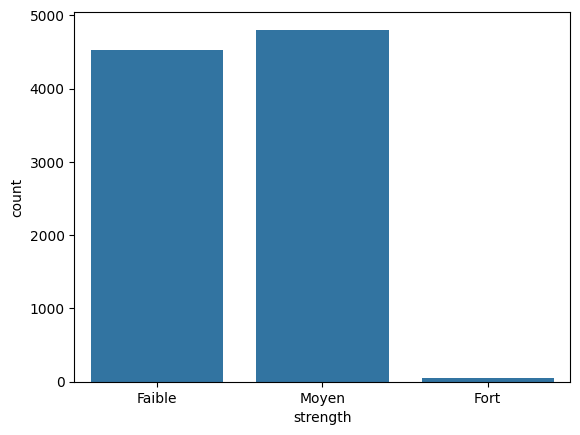

In [17]:
sns.countplot(x = 'strength', data = df)

### Modèle Supervisé

In [18]:
# Split into features and labels
X = df[['length', 'upper', 'lower', 'digit', 'spe']]
y = df['strength']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9738805970149254


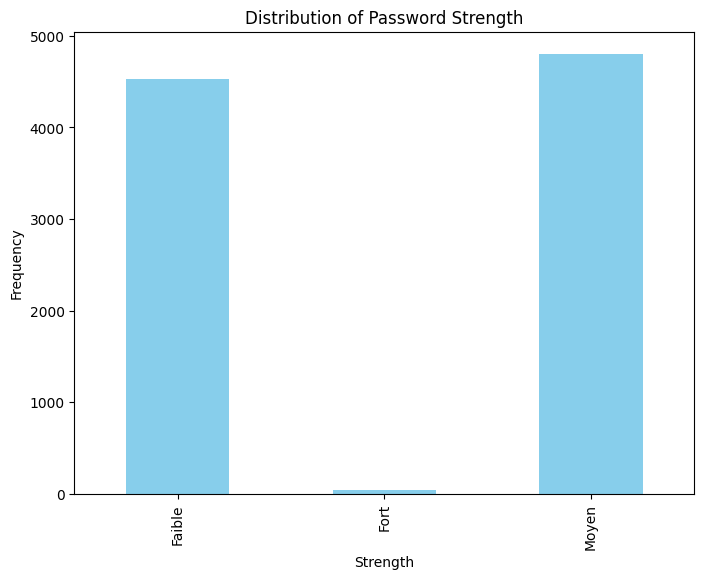

In [19]:
plt.figure(figsize=(8, 6))
df['strength'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

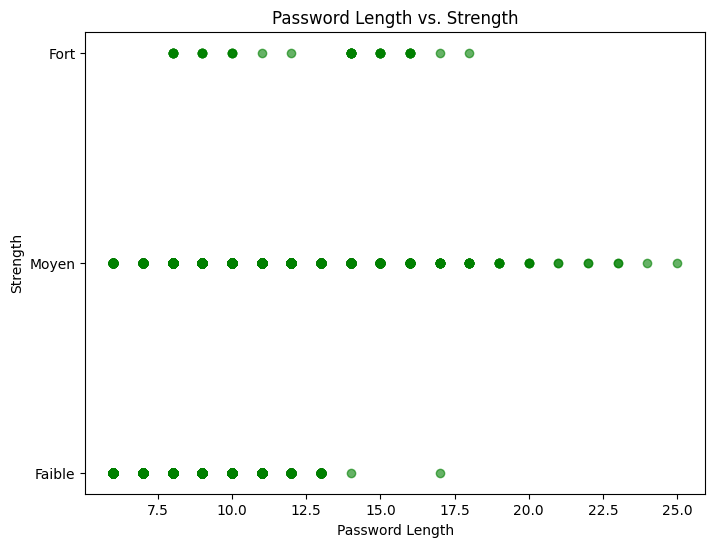

In [20]:
# Scatter plot to show the relationship between length and strength
plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['strength'], c='green', alpha=0.6)
plt.title('Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()

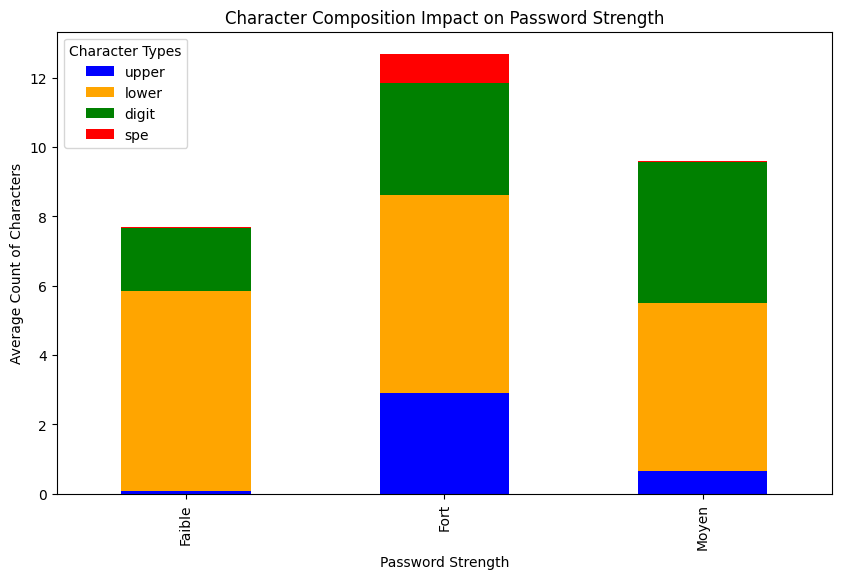

In [21]:
# Prepare data for a stacked bar chart
df_grouped = df.groupby('strength').mean(numeric_only='true')[['upper', 'lower', 'digit', 'spe']]

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])
plt.title('Character Composition Impact on Password Strength')
plt.xlabel('Password Strength')
plt.ylabel('Average Count of Characters')
plt.legend(title='Character Types', loc='upper left')
plt.show()


In [22]:
def character_input(pwd, scaler) :
    f = extract_features(pwd)
    print(f)
    f_scaled = scaler.transform([f])
    return f_scaled

In [36]:
user_inp = input()
#user_inp = character_input(user_inp, scaler)
user_inp_f = np.array(extract_features(user_inp)).reshape(1, -1)
print(user_inp_f)
df_inp = pd.DataFrame(user_inp_f, columns=['password', 'length', 'upper', 'lower', 'digit', 'spe', 'strength'])
inp_x = df_inp[['length', 'upper', 'lower', 'digit', 'spe']].values
inp_y = df_inp['strength']
inp_pred = scaler.transform(inp_x)

print(df_inp)

strength = knn.predict(scaler.transform(inp_x))

print(strength)

[['vnbjhn89+' '9' '0' '6' '2' '1' 'Moyen']]
    password length upper lower digit spe strength
0  vnbjhn89+      9     0     6     2   1    Moyen
['Moyen']


C:\Users\kajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\kajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
